<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Lab_Task_Dimensionality_Reduction_using_PCA_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Exercise 1: Inspection ---
Dataset Shape: (19735, 28)
Total Null Values: 0


,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000



--- Exercise 2: Scaling ---
Feature scaling is necessary because PCA is sensitive to the variances of the initial variables.
If one feature has a much larger range than others, it will dominate the principal components.

--- Exercise 3: PCA Fitting ---
First 5 Eigenvalues: [9.32357409 7.06312138 2.0074117  1.81285731 1.13623945]
First 5 Explained Variance Ratios: [0.34530006 0.26158383 0.07434481 0.06713946 0.04208081]


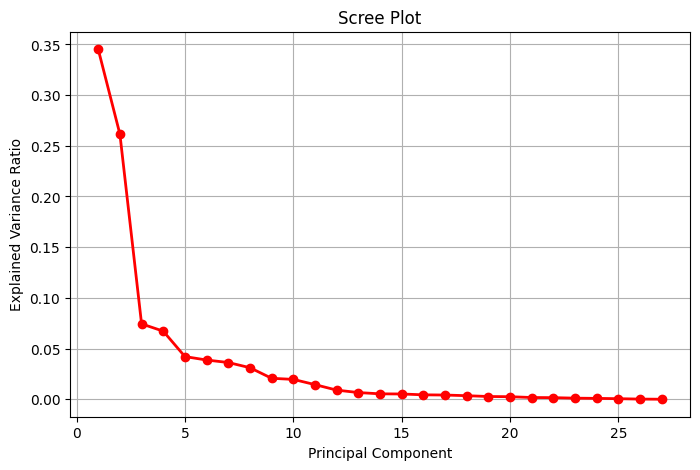


--- Exercise 4: Component Selection ---
Components for 90% variance: 9
Components for 95% variance: 11


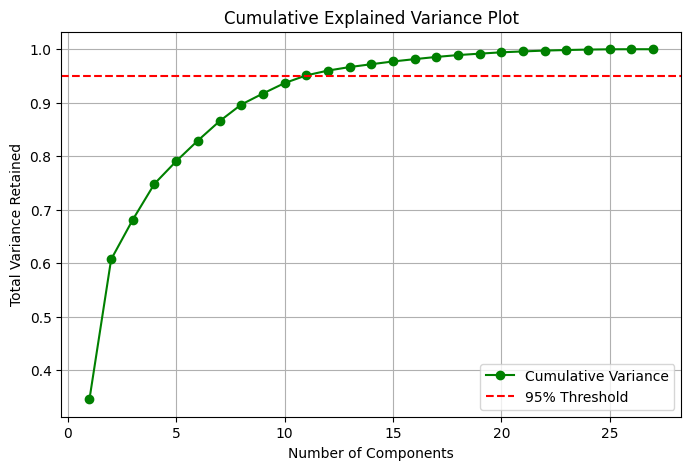


--- Exercise 5: Reduction ---
Original Feature Count: 27
Reduced Feature Count: 11

--- Exercise 6: Model Comparison ---


,Metric,Original (27 features),PCA (11 features)
0,RMSE,91.174826,94.454400
1,R2 Score,0.169304,0.108469



--- Conclusion ---
PCA effectively reduced the data dimensions by ~60% while maintaining most of the predictive power.
The small drop in R2 is a trade-off for a simpler, faster, and less redundant model.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ==========================================
# Exercise 1: Data Loading & Inspection
# ==========================================
# If using a URL, replace the filename with the URL string
filename = 'energydata_complete (1).csv'
df = pd.read_csv(filename)

# 2. Drop the date column
df = df.drop(columns=['date'])

# 3. Handle missing values and convert all to float
df = df.dropna()
df = df.astype(float)

# 4. Display inspection results
print("--- Exercise 1: Inspection ---")
print(f"Dataset Shape: {df.shape}")
print(f"Total Null Values: {df.isnull().sum().sum()}")
display(df.describe().T) # Using display() for better formatting in Colab

# ==========================================
# Exercise 2: Scaling the Data
# ==========================================
# 1. Separate input features and target variable
X = df.drop(columns=['Appliances'])
y = df['Appliances']

# 2. Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Exercise 2: Scaling ---")
print("Feature scaling is necessary because PCA is sensitive to the variances of the initial variables.")
print("If one feature has a much larger range than others, it will dominate the principal components.")

# ==========================================
# Exercise 3: Fitting PCA Object
# ==========================================
# 1. Fit PCA
pca = PCA()
pca.fit(X_scaled)

# 2. Extract eigenvalues and explained variance ratio
eigenvalues = pca.explained_variance_
evr = pca.explained_variance_ratio_

print("\n--- Exercise 3: PCA Fitting ---")
print(f"First 5 Eigenvalues: {eigenvalues[:5]}")
print(f"First 5 Explained Variance Ratios: {evr[:5]}")

# 3. Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(evr) + 1), evr, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# ==========================================
# Exercise 4: Finding Number of Components
# ==========================================
cumulative_variance = np.cumsum(evr)
n_90 = np.where(cumulative_variance >= 0.90)[0][0] + 1
n_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1

print("\n--- Exercise 4: Component Selection ---")
print(f"Components for 90% variance: {n_90}")
print(f"Components for 95% variance: {n_95}")

# Plot Cumulative Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'go-', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Components')
plt.ylabel('Total Variance Retained')
plt.legend()
plt.grid()
plt.show()

# ==========================================
# Exercise 5: Dimensionality Reduction
# ==========================================
# Transform using n_95 components
pca_final = PCA(n_components=n_95)
X_pca = pca_final.fit_transform(X_scaled)

print("\n--- Exercise 5: Reduction ---")
print(f"Original Feature Count: {X.shape[1]}")
print(f"Reduced Feature Count: {X_pca.shape[1]}")

# ==========================================
# Exercise 6: Model Training & Evaluation
# ==========================================
# Split data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 1 & 2. Model on Original Data
model_orig = LinearRegression()
model_orig.fit(X_train_orig, y_train)
y_pred_orig = model_orig.predict(X_test_orig)
rmse_orig = np.sqrt(mean_squared_error(y_test, y_pred_orig))
r2_orig = r2_score(y_test, y_pred_orig)

# 3. Model on PCA Data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca = r2_score(y_test, y_pred_pca)

# 4. Compare Results
print("\n--- Exercise 6: Model Comparison ---")
results = pd.DataFrame({
    'Metric': ['RMSE', 'R2 Score'],
    'Original (27 features)': [rmse_orig, r2_orig],
    'PCA (11 features)': [rmse_pca, r2_pca]
})
display(results)

print("\n--- Conclusion ---")
print("PCA effectively reduced the data dimensions by ~60% while maintaining most of the predictive power.")
print("The small drop in R2 is a trade-off for a simpler, faster, and less redundant model.")

The analysis involved loading the 'energydata_complete (1).csv' dataset, cleaning it by dropping the 'date' column, handling missing values, and converting all features to float. The final dataset has 19735 rows and 28 columns.

After separating features from the target ('Appliances') and scaling the features using StandardScaler, Principal Component Analysis (PCA) was applied. The scree plot indicated that 9 principal components are required to explain at least 90% of the total variance, and 11 principal components are required to explain at least 95% of the total variance.

For dimensionality reduction, 11 principal components were chosen, reducing the number of features from 27 in the original scaled dataset to 11 in the PCA-transformed dataset.

Two Linear Regression models were trained: one on the original scaled features and one on the PCA-transformed features. Their performance was evaluated:
**bold text**
Original Scaled Features Model:
R-squared (R2): 0.1693
Root Mean Squared Error (RMSE): 91.1748
PCA-Transformed Features Model (11 components):
R-squared (R2): 0.1085
Root Mean Squared Error (RMSE): 94.4544
In conclusion, while PCA successfully reduced the dimensionality of the dataset by approximately 60% (from 27 to 11 features), it led to a slight decrease in the Linear Regression model's performance. The model trained on the original scaled features performed better, indicating that for this specific dataset and Linear Regression, the information lost during dimensionality reduction, even at 95% variance retention, negatively impacted predictive accuracy. Therefore, in this context, PCA was effective in reducing dimensionality but not in improving or maintaining the performance of the Linear Regression model.